##### README and setup

- Created by **Mark Mahoney** for the NOVA Code Camp Event on April 6th 2018
- To view this as a presentation, run: `jupyter nbconvert computer-prices.ipynb --to slides --post serve`

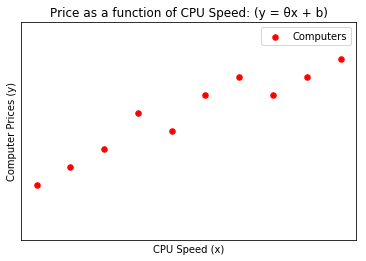

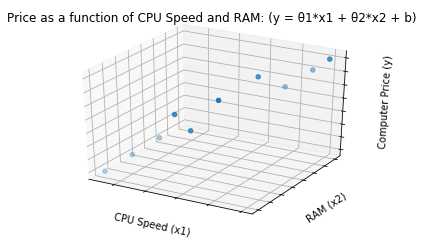

In [3]:
# graph generation
# ignore this slide during presentation

import matplotlib.pyplot as plt
import numpy as np
x1 = [1,2,3,4,5,6,7,8,9,10]
x2 = [1,2,3,3,3,4,6,7,8,8]
y = [3,4,5,7,6,8,9,8,9,10]

# 2D Scatter Plot
plt.scatter(x1, y, color= "red", s=30, label="Computers")
plt.ylim([0,12])
 
plt.xlabel('CPU Speed (x)')
plt.ylabel('Computer Prices (y)')
plt.title('Price as a function of CPU Speed: (y = θx + b)')
plt.legend()
plt.xticks([])
plt.yticks([])

# p = np.poly1d(np.polyfit(x1, y, 1))
# plt.plot(x1,p(x1),"b--")

# plt.title('y = θx + b')

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('CPU Speed (x1)')
ax.set_ylabel('RAM (x2)')
ax.set_zlabel('Computer Price (y)')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
 
ax.scatter(x1,x2,y)
plt.title('Price as a function of CPU Speed and RAM: (y = θ1*x1 + θ2*x2 + b)')

plt.show()

In [4]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

{'height': 768, 'scroll': True, 'width': 1024}

# Part 0. Introduction

## The Challange:
### Can we train a program to predict the price of a laptop based on the laptop's technical stats?

- How would we visualize price as a function of 1 variable?
![](plot0.png)

- How could we estimate the price based on this data?
![](plot1.png)

- How would we visualize price as a function of 2 variables?
![](plot2.png)

- What about 3 variables? 4? 5? 10? 100? 1,000,000?

### Can our program find values for theta so that the equation:
## θ<sub>0</sub> + θ<sub>1</sub>\*x<sub>1</sub> + θ<sub>2</sub>\*x<sub>2</sub> + ... + θ<sub>j</sub>\*x<sub>j</sub> = y

... will accurately predict the price of a computer?

## Example: 
#### Computer
- 128G SSD \(x<sub>1</sub>\)
- 2.8Ghz CPU \(x<sub>2</sub>\)
- 8GB RAM \(x<sub>3</sub>\)
- $1020 \(y\)

#### Theta 
- θ<sub>0</sub>: 40
- θ<sub>1</sub>: 2.5 
- θ<sub>2</sub>: 200
- θ<sub>3</sub>: 12.5

#### 40 + 2.5\*128 + 200\*2.8 + 12.5\*8 = $1020


### This is an example of a Supervised Regression problem!

[](ml-chart.png)
[Image source - differencebetween.net](http://www.differencebetween.net/technology/differences-between-supervised-learning-and-unsupervised-learning/)

# Part 1. Prepare our data

### Load the CSV into our project

Data Source: https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Computers.csv [View this File](/edit/Computers.csv)

In [5]:
import csv

with open('Computers.csv') as f:
    data = list(csv.reader(f))
 
print('Number of Rows: ', len(data))
print('Number of Cols: ', len(data[0]))
print(data)

Number of Rows:  6260
Number of Cols:  11
[['', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium', 'ads', 'trend'], ['1', '1499', '25', '80', '4', '14', 'no', 'no', 'yes', '94', '1'], ['2', '1795', '33', '85', '2', '14', 'no', 'no', 'yes', '94', '1'], ['3', '1595', '25', '170', '4', '15', 'no', 'no', 'yes', '94', '1'], ['4', '1849', '25', '170', '8', '14', 'no', 'no', 'no', '94', '1'], ['5', '3295', '33', '340', '16', '14', 'no', 'no', 'yes', '94', '1'], ['6', '3695', '66', '340', '16', '14', 'no', 'no', 'yes', '94', '1'], ['7', '1720', '25', '170', '4', '14', 'yes', 'no', 'yes', '94', '1'], ['8', '1995', '50', '85', '2', '14', 'no', 'no', 'yes', '94', '1'], ['9', '2225', '50', '210', '8', '14', 'no', 'no', 'yes', '94', '1'], ['10', '2575', '50', '210', '4', '15', 'no', 'no', 'yes', '94', '1'], ['11', '2195', '33', '170', '8', '15', 'no', 'no', 'yes', '94', '1'], ['12', '2605', '66', '210', '8', '14', 'no', 'no', 'yes', '94', '1'], ['13', '2045', '50', '130', '4', '14',

### Convert to a 2D Numpy Array

In [11]:
import numpy as np
np.set_printoptions(threshold=np.inf)

data_array = np.array(data)

print(data_array[:5])

[['' 'price' 'speed' 'hd' 'ram' 'screen' 'cd' 'multi' 'premium' 'ads'
  'trend']
 ['1' '1499' '25' '80' '4' '14' 'no' 'no' 'yes' '94' '1']
 ['2' '1795' '33' '85' '2' '14' 'no' 'no' 'yes' '94' '1']
 ['3' '1595' '25' '170' '4' '15' 'no' 'no' 'yes' '94' '1']
 ['4' '1849' '25' '170' '8' '14' 'no' 'no' 'no' '94' '1']]


- price: price in US dollars of 486 PCs

- speed: clock speed in MHz

- hd: size of hard drive in MB

- ram: size of Ram in in MB

- screen: size of screen in inches

- cd: is a CD-ROM present ?

- multi: is a multimedia kit (speakers, sound card) included ?

- premium: is the manufacturer was a "premium" firm (IBM, COMPAQ) ?

- ads: number of 486 price listings for each month

- trend: time trend indicating month starting from January of 1993 to November of 1995.

## Manipulate Our Data

### Randomize Rows

In [12]:
data_rand = np.copy(data_array)
np.random.shuffle(data_rand[1:])

print(data_rand[0:5])

[['' 'price' 'speed' 'hd' 'ram' 'screen' 'cd' 'multi' 'premium' 'ads'
  'trend']
 ['3653' '3304' '66' '420' '16' '17' 'yes' 'no' 'yes' '339' '17']
 ['5213' '2139' '33' '212' '8' '17' 'yes' 'yes' 'yes' '182' '24']
 ['1022' '1999' '33' '230' '4' '14' 'no' 'no' 'yes' '298' '8']
 ['1448' '2595' '33' '340' '8' '17' 'no' 'no' 'yes' '246' '9']]


### Remove Unnecessary Columns

In [13]:
# Remove row number column
data_values = np.delete(data_rand, 0, 1)
print(data_values[0:5])

[['price' 'speed' 'hd' 'ram' 'screen' 'cd' 'multi' 'premium' 'ads'
  'trend']
 ['3304' '66' '420' '16' '17' 'yes' 'no' 'yes' '339' '17']
 ['2139' '33' '212' '8' '17' 'yes' 'yes' 'yes' '182' '24']
 ['1999' '33' '230' '4' '14' 'no' 'no' 'yes' '298' '8']
 ['2595' '33' '340' '8' '17' 'no' 'no' 'yes' '246' '9']]


### Convert yes/no values to binary

In [14]:
def convert_yes_no(value):
    return 1 if value == 'yes' else (0 if value == 'no' else value)

data_yn_converted = []
for row_i, row in enumerate(data_values):
    data_yn_converted.append([])
    for col_value in row:
        data_yn_converted[row_i].append(convert_yes_no(col_value))
        
data_clean = np.array(data_yn_converted)

print (data_clean[0:5])

[['price' 'speed' 'hd' 'ram' 'screen' 'cd' 'multi' 'premium' 'ads'
  'trend']
 ['3304' '66' '420' '16' '17' '1' '0' '1' '339' '17']
 ['2139' '33' '212' '8' '17' '1' '1' '1' '182' '24']
 ['1999' '33' '230' '4' '14' '0' '0' '1' '298' '8']
 ['2595' '33' '340' '8' '17' '0' '0' '1' '246' '9']]


### Rearrange columns (Optional)

In [15]:
data_rearranged = np.c_[ data_clean[:, 1:], data_clean[:, 0] ]
print(data_rearranged[:5])

[['speed' 'hd' 'ram' 'screen' 'cd' 'multi' 'premium' 'ads' 'trend'
  'price']
 ['66' '420' '16' '17' '1' '0' '1' '339' '17' '3304']
 ['33' '212' '8' '17' '1' '1' '1' '182' '24' '2139']
 ['33' '230' '4' '14' '0' '0' '1' '298' '8' '1999']
 ['33' '340' '8' '17' '0' '0' '1' '246' '9' '2595']]


### Add Placeholder Value for Y-Intercept (i.e. "b" in y = θx + b)
(It makes the math easier later on!)

Set x<sub>0</sub> = 1 for all rows. So...

#### y = θ<sub>0</sub> + θ<sub>1</sub>\*x<sub>1</sub> + θ<sub>2</sub>\*x<sub>2</sub> + ... + θ<sub>j</sub>x<sub>j</sub>
becomes...
#### y = θ<sub>0</sub>\*x<sub>0</sub> + θ<sub>1</sub>\*x<sub>1</sub> + θ<sub>2</sub>\*x<sub>2</sub> + ... + θ<sub>j</sub>x<sub>j</sub>
which is equal to...
#### y = θ<sub>0</sub>\*1 + θ<sub>1</sub>\*x<sub>1</sub> + θ<sub>2</sub>\*x<sub>2</sub> + ... + θ<sub>j</sub>x<sub>j</sub>

So... θ<sub>0</sub> will always equal itself 

In [17]:
y_int_col = ['y-int']
y_int_col.extend(np.ones(len(data_clean) - 1))

data_prepped = np.c_[ y_int_col, data_rearranged ]

print(data_prepped [0:15])

[['y-int' 'speed' 'hd' 'ram' 'screen' 'cd' 'multi' 'premium' 'ads'
  'trend' 'price']
 ['1.0' '66' '420' '16' '17' '1' '0' '1' '339' '17' '3304']
 ['1.0' '33' '212' '8' '17' '1' '1' '1' '182' '24' '2139']
 ['1.0' '33' '230' '4' '14' '0' '0' '1' '298' '8' '1999']
 ['1.0' '33' '340' '8' '17' '0' '0' '1' '246' '9' '2595']
 ['1.0' '33' '210' '4' '15' '1' '0' '1' '273' '18' '1499']
 ['1.0' '33' '214' '4' '14' '0' '0' '1' '339' '17' '1844']
 ['1.0' '25' '170' '4' '14' '0' '0' '1' '249' '7' '1499']
 ['1.0' '66' '528' '8' '14' '1' '0' '1' '163' '27' '1944']
 ['1.0' '50' '720' '16' '17' '1' '0' '1' '205' '21' '2940']
 ['1.0' '66' '426' '8' '15' '1' '0' '1' '307' '16' '2290']
 ['1.0' '33' '107' '2' '14' '0' '0' '1' '139' '5' '1590']
 ['1.0' '100' '426' '8' '14' '1' '0' '1' '307' '16' '2595']
 ['1.0' '33' '120' '4' '14' '0' '0' '0' '267' '15' '1719']
 ['1.0' '100' '545' '8' '15' '1' '0' '1' '132' '28' '1899']]


### Split Our Data into two parts

In [18]:
num_of_training_examples = int(len(data_prepped)*0.9)

training_set, test_set = data_prepped[:num_of_training_examples], data_prepped[num_of_training_examples:]

print('Number of training examples: ' + str(len(training_set)))
print('Number of test examples: ' + str(len(test_set)))
print('Number of features: ', len(test_set[0]) - 1)

Number of training examples: 5634
Number of test examples: 626
Number of features:  10


# Part 2: Create Our Algorithm to Find Theta

## Initialize Some Parameters For Training Set

In [19]:
X = training_set[1:, :-1].astype(float)
y = training_set[1:, -1].astype(float)

m = len(X)
theta = [0] * len(X[0])
alpha = 0.3
iterations = 500

print('X: ')
print(X[:5])
print('---')
print('y......', y[:5])
print('m......', m)
print('theta..', theta, '\n---\n')

X: 
[[  1.  66. 420.  16.  17.   1.   0.   1. 339.  17.]
 [  1.  33. 212.   8.  17.   1.   1.   1. 182.  24.]
 [  1.  33. 230.   4.  14.   0.   0.   1. 298.   8.]
 [  1.  33. 340.   8.  17.   0.   0.   1. 246.   9.]
 [  1.  33. 210.   4.  15.   1.   0.   1. 273.  18.]]
---
y...... [3304. 2139. 1999. 2595. 1499.]
m...... 5633
theta.. [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
---



### Normalize All the Features

#### Statistics terms:

- **μ or mu:** The mean (i.e. average) of a list of values.  
- **range**: Difference between the highest and lowest item in a list

In [50]:
np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress=True)

# returns a list of means for each feature (the number of features)
mu = np.average(np.transpose(X), axis=1)

# returns list of ranges for each feature
X_range = np.ptp(np.transpose(X), axis=1)

# returns a normalized version of X
def normalize(X):
    normalized_X = []
    for row_num, row in enumerate(X):
        normalized_X.append([])
        for col_num in range(len(row)):
            if (col_num == 0): # y-intercept does not need normalization
                normalized_X[row_num].append(row[col_num])
            else:
                normalized_X[row_num].append(
                    (row[col_num] - mu[col_num]) / X_range[col_num]
                )
    return np.array(normalized_X)

X_norm = normalize(X)

print('mu:    ', mu, '\n')
print('range: ', X_range, '\n')
print('Un-Normalized X:')
print(X[:3],'\n')
print('Normalized X:')
print(X_norm[:3])

mu:     [  1.          51.90218356 416.63731582   8.27871472  14.60962187
   0.46689153   0.13900231   0.90218356 221.65045269  15.93467069] 

range:  [   0.   75. 2020.   30.    3.    1.    1.    1.  300.   34.] 

Un-Normalized X:
[[  1.  66. 420.  16.  17.   1.   0.   1. 339.  17.]
 [  1.  33. 212.   8.  17.   1.   1.   1. 182.  24.]
 [  1.  33. 230.   4.  14.   0.   0.   1. 298.   8.]] 

Normalized X:
[[ 1.          0.18797089  0.0016647   0.25737618  0.79679271  0.53310847
  -0.13900231  0.09781644  0.39116516  0.03133321]
 [ 1.         -0.25202911 -0.1013056  -0.00929049  0.79679271  0.53310847
   0.86099769  0.09781644 -0.13216818  0.23721557]
 [ 1.         -0.25202911 -0.09239471 -0.14262382 -0.20320729 -0.46689153
  -0.13900231  0.09781644  0.25449849 -0.23337267]]


### Some Formulas

In [23]:
np.set_printoptions(threshold=1000)

# Our guess for a good prediction
def hypothesis(theta, X_row):
    # PSEUDO CODE
    # (theta[0] * X_row[0]) + (theta[1] * X_row[1]) + (theta[2] * X_row[2]) ... (theta[m] * X_row[m])
    return sum(np.transpose(theta)*X_row)

def individual_trial_error(theta, X_row, correct_answer):
    return hypothesis(theta, X_row) - correct_answer

def all_errors(theta, X, y):
    # Xs is all rows of X
    # theta is all theta values
    # correct_answers is all y values for all rows
    return np.array([ individual_trial_error(theta, X[row], y[row]) for row in range(len(X)) ])
    
def squared_errors(theta, X, correct_answers):
    return sum([ individual_trial_error(theta, X[row], y[row])**2 for row in range(len(X)) ])

# Our goal is to reduce the output of this function!
def loss_function(theta, X, correct_answers, m):
    return (1/(2*m))*squared_errors(theta, X, correct_answers)

print('theta....................', theta)
print('X_norm[0].....................', X_norm[0])
print('y[0].....................', y[0])
print('m.....................', m)
print('----')
print('hypothesis(theta, X_norm[0]).........................', hypothesis(theta, X_norm[0]))
print('----')
print('individual_trial_error(theta, X_norm[0], y[0])..', individual_trial_error(theta, X_norm[0], y[0]))
print('---')
print('all_errors(theta, X, y).........................', all_errors(theta, X_norm, y))
print('---')
print('squared_errors(theta, X, y).....................', squared_errors(theta, X_norm, y))
print('---')
print('loss_function(theta, X_norm, y, m)..............', loss_function(theta, X_norm, y, m))

theta.................... [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
X_norm[0]..................... [ 1.          0.18797089  0.0016647   0.25737618  0.79679271  0.53310847
 -0.13900231  0.09781644  0.39116516  0.03133321]
y[0]..................... 3304.0
m..................... 5633
----
hypothesis(theta, X_norm[0])......................... 0.0
----
individual_trial_error(theta, X_norm[0], y[0]).. -3304.0
---
all_errors(theta, X, y)......................... [-3304. -2139. -1999. ... -1279. -1815. -3198.]
---
squared_errors(theta, X, y)..................... 29691449162.0
---
loss_function(theta, X_norm, y, m).............. 2635491.6706905733


## (Optional Deep Dive) Helpful tools for matrix manipulation... Vectorization and Transposition

In [20]:
# Transposition Example

example_matrix = [[1,2,3,4,5],
                  [6,7,8,9,10]]

np.transpose(example_matrix)

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

#### Vectorization Example
- Multiply the 1st and 5th item in each row by 2
- Multiply the 2nd item by 3
- Multiply the 3rd and 4th item by 1
- Print an array with the sum of each column

In [21]:
# Vectorization Example

# 1. The Looping Way...
example_matrix = [[1,2,3,4,5],
                  [6,7,8,9,10],
                  [2,4,6,8,10]]

factors = [2,3,1,1,2]

for row_num, row in enumerate(example_matrix):
    for col_num, col in enumerate(row):
        example_matrix[row_num][col_num] = example_matrix[row_num][col_num] * factors[col_num]
        if (row_num !=0):
            example_matrix[0][col_num] = example_matrix[0][col_num] + example_matrix[row_num][col_num]
new_matrix_looped = np.array(example_matrix[0])
# Could also be done with some combination of map or reduce logic
 

# 2. The Vectorized Way... 
example_matrix = np.array([[1,2,3,4,5],
                           [6,7,8,9,10],
                           [2,4,6,8,10]])
factors = np.array([2,3,1,1,2])
new_matrix_vect = sum(example_matrix*factors)
new_matrix_vect = example_matrix.dot(np.transpose(factors))



print('new_matrix (looping)   :', new_matrix_looped)
print('new_matrix (vectorized):', new_matrix_vect)

new_matrix (looping)   : [18 39 17 21 50]
new_matrix (vectorized): [25 70 50]


# Part 3: Apply Gradient Descent

In [30]:
theta = [0] * len(X[0])
print('old theta................', theta)

def partial_derivative_of_loss_function(theta, X, y, col):
    return sum([ all_errors(theta, X, y)[row]*X[row][col] for row in range(len(X)) ])

def gradient_descent(theta, X, y, alpha, m):
    new_theta = []
    new_theta = theta - (alpha*(1/m)*np.sum((all_errors(theta, X, y)*np.transpose(X)), axis=1))
    return np.array(new_theta)
    # for each in theta:
        # new theta = old theta - a* 1/m * sum(all of hypoths - all of our solutions)* all examples of that feature
    
theta = gradient_descent(theta, X_norm, y, alpha, m)


# gradient_descent(X_norm, theta, y, alpha, m)
print('new theta................', theta)
print('X_norm[0]................', X_norm[0])
print('y[0].....................', y[0])
print('m.....................', m)
print('new theta:', theta)

theta = [0] * len(X[0])

old theta................ [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
new theta................ [666.3410616   14.68322131   9.68180333  20.22894215  15.70642609
  16.41633375  -1.22621183  -4.14911682   2.10267682  -8.10350189]
X_norm[0]................ [ 1.          0.18797089  0.0016647   0.25737618  0.79679271  0.53310847
 -0.13900231  0.09781644  0.39116516  0.03133321]
y[0]..................... 3304.0
m..................... 5633
new theta: [666.3410616   14.68322131   9.68180333  20.22894215  15.70642609
  16.41633375  -1.22621183  -4.14911682   2.10267682  -8.10350189]


In [55]:
for i in range(100):
    theta = gradient_descent(theta, X_norm, y, alpha, m)
    print(loss_function(theta, X_norm, y, m))

38587.02266756599
38586.33709320653
38585.65284927555
38584.96993298634
38584.28834156107
38583.60807223096
38582.92912223695
38582.25148882836
38581.57516926362
38580.9001608094
38580.22646074206
38579.55406634643
38578.882974914566
38578.21318374899
38577.54469015936
38576.87749146415
38576.211584990095
38575.54696807193
38574.88363805312
38574.221592284215
38573.56082812515
38572.9013429427
38572.243134112
38571.58619901573
38570.930535045154
38570.27613959806
38569.623010081006
38568.9711439073
38568.32053849838
38567.67119128284
38567.023099696664
38566.37626118382
38565.73067319475
38565.08633318738
38564.44323862751
38563.80138698698
38563.160775745666
38562.52140239021
38561.88326441407
38561.246359318146
38560.6106846095
38559.9762378025
38559.3430164187
38558.71101798558
38558.08024003778
38557.45068011692
38556.82233577057
38556.195204553755
38555.56928402691
38554.94457175803
38554.32106532074
38553.69876229585
38553.07766027005
38552.45775683615
38551.83904959378
38551.221

In [56]:
print('optimum theta:', theta)

optimum theta: [ 2221.136872     707.46815278  1189.42877889  1635.97206063
   370.951696      59.87280331   101.76460193  -500.74098662
   180.73292879 -1693.11637659]


# Part 4: Test Our Solution

In [46]:
X_test = test_set[1:, :-1].astype(float)

y_test = test_set[1:, -1].astype(float)
    
X_test_norm = normalize(X_test)

print('predicted    ', 'actual     ', 'difference   ', 'percent error')
diffs = []
errs = []
for row_num, row in enumerate(X_test_norm):
    predicted_score = hypothesis(theta, X_test_norm[row_num])
    actual_score = y_test[row_num]
    difference = np.absolute(predicted_score - actual_score)
    percent_error = np.absolute((predicted_score - actual_score) / actual_score)
    
    diffs.append(difference)
    errs.append(percent_error)
    
    print('$', np.round(predicted_score, decimals=2), '   ', '$', 
          actual_score, '  ', 
          np.round(difference, decimals=2), '    ', 
          np.round(percent_error, decimals=4))

avg_diff= np.average(diffs)
avg_err = np.average(errs)

print('Average Difference: $', avg_diff)
print('Average Error Rate: %', avg_err)

predicted     actual      difference    percent error
$ 2975.81     $ 3004.0    28.19      0.0094
$ 3144.66     $ 2840.0    304.66      0.1073
$ 1430.42     $ 1604.0    173.58      0.1082
$ 2525.64     $ 2493.0    32.64      0.0131
$ 2658.85     $ 2495.0    163.85      0.0657
$ 1944.67     $ 2194.0    249.33      0.1136
$ 2177.1     $ 2354.0    176.9      0.0752
$ 1172.52     $ 1195.0    22.48      0.0188
$ 2201.54     $ 1799.0    402.54      0.2238
$ 2026.19     $ 2044.0    17.81      0.0087
$ 1564.0     $ 1548.0    16.0      0.0103
$ 2430.22     $ 2644.0    213.78      0.0809
$ 2079.05     $ 1544.0    535.05      0.3465
$ 2333.44     $ 2145.0    188.44      0.0878
$ 1499.98     $ 1544.0    44.02      0.0285
$ 2660.02     $ 2825.0    164.98      0.0584
$ 1625.83     $ 1599.0    26.83      0.0168
$ 1550.42     $ 1699.0    148.58      0.0875
$ 2915.18     $ 2799.0    116.18      0.0415
$ 2298.36     $ 3495.0    1196.64      0.3424
$ 1683.99     $ 1894.0    210.01      0.1109
$ 1639.15  

$ 1720.17     $ 1799.0    78.83      0.0438
$ 2026.19     $ 1990.0    36.19      0.0182
$ 2032.58     $ 2628.0    595.42      0.2266
$ 3152.87     $ 2999.0    153.87      0.0513
$ 3947.81     $ 3994.0    46.19      0.0116
$ 1909.62     $ 1858.0    51.62      0.0278
$ 2085.03     $ 1995.0    90.03      0.0451
$ 1660.46     $ 1590.0    70.46      0.0443
$ 2789.22     $ 3190.0    400.78      0.1256
$ 2289.68     $ 1975.0    314.68      0.1593
$ 2203.58     $ 2394.0    190.42      0.0795
$ 2867.1     $ 3239.0    371.9      0.1148
$ 2210.25     $ 2190.0    20.25      0.0092
$ 1364.32     $ 1395.0    30.68      0.022
$ 1675.12     $ 1495.0    180.12      0.1205
$ 2719.88     $ 2299.0    420.88      0.1831
$ 2188.38     $ 2015.0    173.38      0.086
$ 1564.0     $ 1699.0    135.0      0.0795
$ 1221.08     $ 1199.0    22.08      0.0184
$ 2535.31     $ 2549.0    13.69      0.0054
$ 1185.8     $ 1345.0    159.2      0.1184
$ 2106.55     $ 1695.0    411.55      0.2428
$ 3302.34     $ 3129.0    17

$ 1688.03     $ 1790.0    101.97      0.057
$ 1781.59     $ 2040.0    258.41      0.1267
$ 1979.87     $ 1895.0    84.87      0.0448
$ 1484.03     $ 1844.0    359.97      0.1952
$ 2177.1     $ 2195.0    17.9      0.0082
$ 2363.32     $ 2594.0    230.68      0.0889
$ 2376.39     $ 2225.0    151.39      0.068
$ 1573.24     $ 1844.0    270.76      0.1468
$ 1737.57     $ 1495.0    242.57      0.1623
$ 1694.06     $ 1595.0    99.06      0.0621
$ 1591.28     $ 1545.0    46.28      0.03
$ 2434.8     $ 2125.0    309.8      0.1458
$ 2757.72     $ 2690.0    67.72      0.0252
$ 2448.77     $ 2325.0    123.77      0.0532
$ 2572.89     $ 2325.0    247.89      0.1066
$ 2394.04     $ 1939.0    455.04      0.2347
$ 1491.06     $ 1744.0    252.94      0.145
$ 1056.49     $ 1495.0    438.51      0.2933
$ 2095.82     $ 1995.0    100.82      0.0505
$ 1975.37     $ 2090.0    114.63      0.0548
$ 1752.46     $ 1349.0    403.46      0.2991
$ 3036.74     $ 2995.0    41.74      0.0139
$ 2210.65     $ 1788.0   

# Do it in under 20 lines of code

In [42]:
from sklearn import model_selection, linear_model, svm, ensemble
import numpy as np
np.set_printoptions(suppress=True)

data = np.genfromtxt('Computers.csv', delimiter=',', dtype=int)[1:,1:]

X_train, X_test, y_train, y_test = model_selection.train_test_split(data[:,1:-1], data[:, 0])
reg = linear_model.LinearRegression()
reg.fit (X_train, y_train)
predict = np.round(reg.predict(X_test), decimals=2)
actual = y_test
print('predicted    ', 'actual     ', 'difference   ', 'percent error')
for guess_num in range(len(predict)):
    print('$', predict, '   ', '$', actual, '  ', np.absolute(predict - actual), '    ', np.absolute(percent_error))

predicted     actual      difference    percent error
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 242

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482

$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482.54 106.44 150.94]      0.06670654757980732
$ [3323.68 1951.04 2422.93 ... 2122.54 2522.56 2643.06]     $ [2873 1995 2427 ... 1640 2629 2794]    [450.68  43.96   4.07 ... 482